In [48]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END
from IPython.display import Image, display
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.output_parsers import PydanticOutputParser
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
import operator
import asyncio
import json
import uuid
import websockets
from typing import Dict, List, Any, Optional

## tools related libraries 
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [60]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model='gpt-3.5-turbo')
response = llm.invoke("can you tell me about the india's capital?")
print(response.content)

The capital of India is New Delhi. It is located in the northern part of the country and serves as the seat of the government and the center of political activities in India. New Delhi was officially declared the capital of India in 1911, taking over from the previous capital, Calcutta. The city is known for its historic monuments, government buildings, and cultural landmarks, such as the iconic India Gate and the Rashtrapati Bhavan (President's House). New Delhi is also a major hub for commerce, education, and tourism in India.


In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [61]:
response

AIMessage(content="The capital of India is New Delhi. It is located in the northern part of the country and serves as the seat of the government and the center of political activities in India. New Delhi was officially declared the capital of India in 1911, taking over from the previous capital, Calcutta. The city is known for its historic monuments, government buildings, and cultural landmarks, such as the iconic India Gate and the Rashtrapati Bhavan (President's House). New Delhi is also a major hub for commerce, education, and tourism in India.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 17, 'total_tokens': 128, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0I0MbcF4nk8cvcjvV

In [62]:
response.content

"The capital of India is New Delhi. It is located in the northern part of the country and serves as the seat of the government and the center of political activities in India. New Delhi was officially declared the capital of India in 1911, taking over from the previous capital, Calcutta. The city is known for its historic monuments, government buildings, and cultural landmarks, such as the iconic India Gate and the Rashtrapati Bhavan (President's House). New Delhi is also a major hub for commerce, education, and tourism in India."

In [63]:
from langchain.tools import tool

## this is my custom tools

In [64]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [65]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [66]:
search.invoke("what is the latest update on iphone17 release?")

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


"Jul 11, 2025 · Apple’s iPhone 17 is shaping up to be one of the most significant updates in recent years. With design overhauls, … 2 days ago · 2025 may bring one of the biggest updates to the iPhone's design that we've seen since the 2017 iPhone X, with Apple … Jul 16, 2025 · Exactly when the iPhone 17 series will be unveiled has just become a little clearer in a report from an industry … Apr 27, 2025 · Apple’s next major release, the iPhone 17 series, is shaping up to be one of its most exciting launches in years. With a mix of cutting-edge design, powerful new hardware, and a shift in strategy for its product lineup, there’s a lot more happening under the surface than usual. Jul 2, 2025 · Below is a detailed look at what the iPhone 17 brings to the table and how it fits into Apple’s broader strategy in a new video …"

In [67]:
# !pip install duckduckgo_search


In [68]:
tools=[multiply, add, divide, search]

In [69]:
llm_with_tools=llm.bind_tools(tools)

In [70]:
response=llm_with_tools.invoke("hi")

In [71]:
response.content

'Hello! How can I assist you today?'

In [72]:
response.tool_calls

[]

In [73]:
response=llm_with_tools.invoke("what is 2+2?")

In [74]:
response.content

''

In [75]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'call_EVLHtAZWJXvL9LmjrEYxK822',
  'type': 'tool_call'}]

In [76]:
response=llm_with_tools.invoke("what is 10/2?")

In [77]:
response.content

''

In [78]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'call_HxyPUCmBCLNanQ9RQGTyRG7H',
  'type': 'tool_call'}]

In [79]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [80]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ichvL79O9LFVaJQq7Mh5AviL', 'function': {'arguments': '{"query":"current age of the TATA Group"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 263, 'total_tokens': 286, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0I13itCBGMEZFCqUJwVqoPGhHFfB', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5d58aec0-a140-4f4e-874d-fe1985a858c5-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'current age of the TATA Group'}, 'id': 'call_ichvL79O9LFVaJQq7Mh5AviL', 'type': 'tool_call'}], usage_metadata={'input_tokens': 263, 'output_tokens': 23, '

In [81]:
response.content

''

In [82]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current age of the TATA Group'},
  'id': 'call_ichvL79O9LFVaJQq7Mh5AviL',
  'type': 'tool_call'}]

In [83]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [84]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [85]:
user_query=["tell me what is 2+2"]

In [86]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [87]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    
    

In [88]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [89]:
builder=StateGraph(MessagesState)

In [90]:
builder.add_node("llm_decision_step",function_1)

In [91]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001E8CF457A60>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001E8CF457EC0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001E8CF457E20>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [92]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [93]:
builder.add_edge(START,"llm_decision_step")

In [94]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [95]:
builder.add_edge("tools","llm_decision_step")

In [97]:
react_graph=builder.compile()

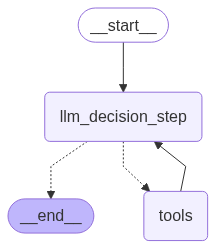

In [98]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [99]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [100]:
react_graph.invoke({"messages":message})

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='ba2ebfd6-25aa-463b-9a3d-ffb215d877b2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_VkZFDTHO0z043pVjhdk0r2Jl', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 287, 'total_tokens': 307, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0I1lyNlBdy3sZ3AGv9JmpqrHMydk', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--310f0d53-295a-47af-9285-3b59e24e58b6-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 

In [101]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [102]:
react_graph.invoke({"messages":message})

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='2d141355-812e-4235-b116-00e6530f4e49'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_EAPlS989OTOPyiXQTtVFmzd0', 'function': {'arguments': '{"query":"Elon Musk net worth"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 291, 'total_tokens': 312, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0I2P2rLaVurnzAKbPLYBjej3sCxl', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f6346165-31fe-4b7e-b27c-a6cb24876ea5-0', tool_calls=[{'name': 'duckduckgo_sear

In [103]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [104]:
response=react_graph.invoke({"messages":message})

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [105]:
response["messages"][-1].content

'The speed of light in a vacuum is 299,792,458 m/s. When multiplied by 10, the result is 2,997,924,580.'

In [106]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_SrHXD7xIy5JQDkIIxkvA6y3C)
 Call ID: call_SrHXD7xIy5JQDkIIxkvA6y3C
  Args:
    query: speed of light in m/s
================================= Tool Message =================================
Name: duckduckgo_search

Since 1983, the constant c has been defined in the International System of Units (SI) as exactly 299 792 458 m/s; this … Jun 20, 2025 · speed of light, speed at which light waves propagate through different materials. In particular, the value for the speed of light in a vacuum is now defined as exactly 299,792,458 metres per second. Oct 29, 2024 · Learn what is the speed of light in a vacuum and how it affects physics and space travel. Find out how to measure distances in light-years and what is faster than light. 5 days ag

In [108]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 43.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 11.3/11.3 MB 59.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15703 sha256=5d97a6d86ffeb8204e362f

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
C:\Users\samra\AppData\Roaming\Python\Python311\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  return process_handler(cmd, _system_body)
C:\Users\samra\AppData\Roaming\Python\Python311\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  return process_handler(cmd, _system_body)
C:\Users\samra\AppData\Roaming\Python\Python311\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed fil

In [109]:
import yfinance as yf

In [110]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [111]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $207.57.'

In [112]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $308.27.'

In [113]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001E8CF457A60>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001E8CF457EC0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001E8CF457E20>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [114]:
tools = [add, multiply, divide, search,get_stock_price]

In [115]:
llm_with_tools=llm.bind_tools(tools)

In [116]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [117]:
response.content

''

In [118]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'call_MKGktxSRBXF4QaFoFggjws5Y',
  'type': 'tool_call'}]

In [120]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [121]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

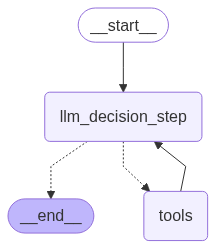

In [122]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [123]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [124]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_YwoME5BgmrfGuhPpFHET5Y6S)
 Call ID: call_YwoME5BgmrfGuhPpFHET5Y6S
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $207.57.
================================== Ai Message ==================================
Tool Calls:
  add (call_z1vDT52FIVnJJnMNMtginaxI)
 Call ID: call_z1vDT52FIVnJJnMNMtginaxI
  Args:
    a: 207.57
    b: 1000
================================= Tool Message =================================
Name: add

Error: 1 validation error for add
a
  Input should be a valid integer, got a number with a fractional part [type=int_from_float, input_value=207.57, input_type=float]
    For further information visit https://errors.pyd

In [125]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [126]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_HtoU1wETnBTZkBXBhIdsWfdy)
 Call ID: call_HtoU1wETnBTZkBXBhIdsWfdy
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $207.57.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_H4RQUK7X5UNijAsZZ53PF1dX)
 Call ID: call_H4RQUK7X5UNijAsZZ53PF1dX
  Args:
    a: 20757
    b: 2
  duckduckgo_search (call_8GxOt1SA39itDbT6QzSl2sZf)
 Call ID: call_8GxOt1SA39itDbT6QzSl2sZf
  Args:
    query: latest news about Apple
================================= Tool Message =================================
Name: multiply

41514
===========================

In [ ]:
next class:
1. human in loop
2. agentic RAG
3. multiagent system(collabation and supervisor)
4. some mislionoius concept of the langgraph: sub graph, parllal execution etc

In [ ]:
Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    